In [1]:
import sys
sys.path.append('../../src/')

import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from utils.utils import train_data, plot_results


%matplotlib inline

In [2]:
name = "Reference"
activation = 'relu'
batch_size = 128
neurons_number = 128
epochs = 20
optimize = 'Adam'

In [7]:
# build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(neurons_number, input_shape=(1,), name='input', activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(neurons_number, activation=activation))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, name='output'))
# summary of the model
model.summary()
model.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mse', 'mean_absolute_error'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               256       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [8]:
X_train, Y_train = train_data(start=0, end=0.8, number=10)
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/20
1/1 [==============================] - 0s 371ms/step - loss: 0.1359 - mse: 0.1359 - mean_absolute_error: 0.3091 - val_loss: 0.5260 - val_mse: 0.5260 - val_mean_absolute_error: 0.7240
Epoch 2/20
1/1 [==============================] - 0s 16ms/step - loss: 0.1210 - mse: 0.1210 - mean_absolute_error: 0.2905 - val_loss: 0.4705 - val_mse: 0.4705 - val_mean_absolute_error: 0.6847
Epoch 3/20
1/1 [==============================] - 0s 14ms/step - loss: 0.1047 - mse: 0.1047 - mean_absolute_error: 0.2694 - val_loss: 0.4067 - val_mse: 0.4067 - val_mean_absolute_error: 0.6365
Epoch 4/20
1/1 [==============================] - 0s 14ms/step - loss: 0.0862 - mse: 0.0862 - mean_absolute_error: 0.2388 - val_loss: 0.3325 - val_mse: 0.3325 - val_mean_absolute_error: 0.5754
Epoch 5/20
1/1 [==============================] - 0s 16ms/step - loss: 0.0549 - mse: 0.0549 - mean_absolute_error: 0.1920 - val_loss: 0.2527 - val_mse: 0.2527 - val_mean_absolute_error: 0.5015
Epoch 6/20
1/1 [==================

In [9]:
X_test, Y_test = train_data(start=0, end=1.0, number=200)
loss, mse, mean_absolute_error = model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 414us/step - loss: 0.0561 - mse: 0.0561 - mean_absolute_error: 0.1937


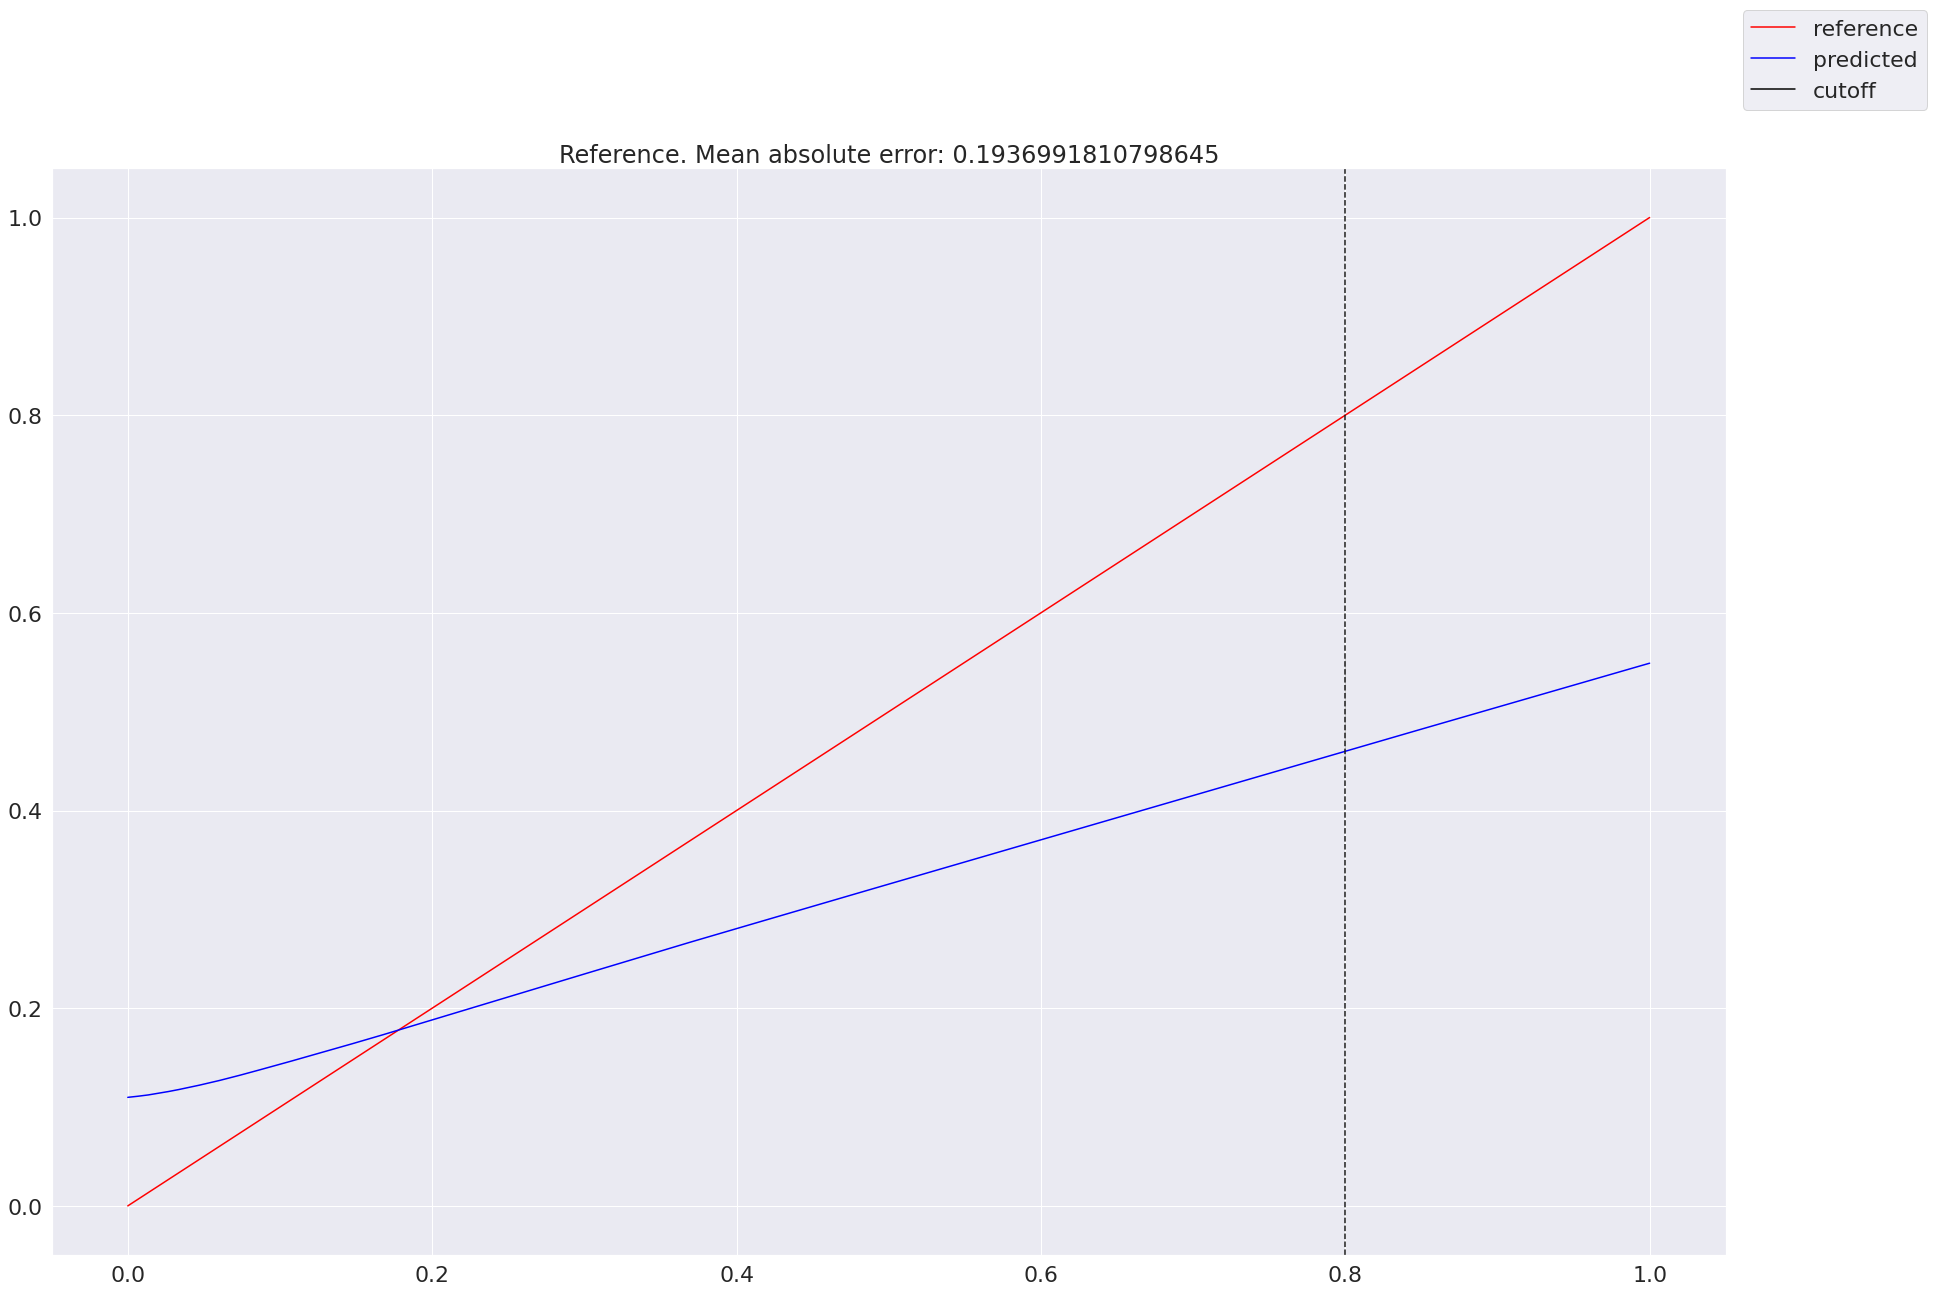

In [10]:
grid = np.linspace(0, 1.0, 150)
predicted = model.predict(grid).reshape((150,))

plot_results(grid, predicted, name, mean_absolute_error, 0.8)